## *Name : Hussain Akbar*
## *Roll no : 112*

In [1433]:
print("running")

running


In [1434]:
import pandas as pd

In [1435]:
df = pd.read_csv("Gold_data.csv")

## *Data cleaning*

*Info*

In [1436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6886 entries, 0 to 6885
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      6886 non-null   object 
 1   Price     6886 non-null   float64
 2   Open      6886 non-null   float64
 3   High      6886 non-null   float64
 4   Low       6886 non-null   float64
 5   Vol       6886 non-null   object 
 6   Change %  6886 non-null   float64
dtypes: float64(5), object(2)
memory usage: 376.7+ KB


In [1437]:
df = pd.DataFrame(df)

*Head*

In [1438]:
df.head()

,Date,Price,Open,High,Low,Vol,Change %
0,"Dec 06, 1994",375.8,375.6,376.5,375.1,0.99K,0.0008
1,"Dec 07, 1994",376.1,377.0,377.5,375.1,1.88K,0.0008
2,"Dec 08, 1994",376.6,375.3,376.7,374.8,0.48K,0.0013
3,"Dec 09, 1994",377.0,375.6,377.0,375.5,0.38K,0.0011
4,"Dec 12, 1994",377.5,376.8,377.8,376.5,0.07K,0.0013


*column check to avoid error*

In [1439]:
column = list(df.columns)
column

['Date', 'Price', 'Open', 'High', 'Low', 'Vol', 'Change %']

*Drop column that is not needed*

In [1440]:
df.drop(columns='Vol',inplace=True)

## **check n/a values**

In [1441]:
df.isna().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
dtype: int64

## **Check duplicate**

In [1442]:
df.duplicated('Open').sum()

2193

## **Drop duplicate**

In [1443]:
df.drop_duplicates(subset='Open',inplace=True)
df.duplicated('Open').sum()

0

## **Again check**

In [1444]:
df.duplicated('Open').sum()

0

 ## **Description**

In [1445]:
df.describe()

,Price,Open,High,Low,Change %
count,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000
mean,1021.398395,1018.012320,1021.997315,1013.627805,0.000336
std,526.668740,524.411408,526.725132,521.834371,0.013429
min,253.000000,252.900000,252.900000,252.500000,-0.111300
25%,427.500000,427.300000,428.500000,426.500000,-0.004900
50%,1159.700000,1155.500000,1160.600000,1149.200000,0.000300
75%,1413.100000,1404.200000,1408.000000,1398.700000,0.006000
max,2115.200000,2121.700000,2121.700000,2121.700000,0.127100


# *Data agregation*

### Applying aggregation across all the columns 

In [1446]:
df.aggregate(['sum', 'min'])

,Date,Price,Open,High,Low,Change %
sum,"Dec 06, 1994Dec 07, 1994Dec 08, 1994Dec 12, 19...",4793422.67,4777531.82,4796233.4,4756955.29,1.5759
min,"Apr 01, 1998",253.00,252.90,252.9,252.50,-0.1113


## **We are going to find aggregation for these columns** 
This function lets you perform several calculations at once, like getting the total, average, and maximum of a column in one go.

In [1447]:
df.aggregate({"Price":['sum', 'min'], 
              "High":['max', 'min'], 
             }) 

,Price,High
sum,4793422.67,NaN
min,253.00,252.9
max,NaN,2121.7


## **Common Aggregations with groupby():**
Think of it like sorting your data into groups (e.g., by category) and then calculating things like totals or averages for each group.

In [1448]:
df.groupby('Price').agg({'Open': ['sum', 'mean', 'max', 'min']})


Open                        
           sum    mean     max     min
Price                                 
253.0    254.0   254.0   254.0   254.0
253.2    253.5   253.5   253.5   253.5
253.5    254.9   254.9   254.9   254.9
253.7    253.7   253.7   253.7   253.7
253.8    253.8   253.8   253.8   253.8
...        ...     ...     ...     ...
2062.9  2024.6  2024.6  2024.6  2024.6
2073.0  2121.7  2121.7  2121.7  2121.7
2084.2  2068.7  2068.7  2068.7  2068.7
2093.3  2098.5  2098.5  2098.5  2098.5
2115.2  2086.7  2086.7  2086.7  2086.7

[4016 rows x 4 columns]

## **Used to summarize and aggregate data with multiple dimensions.**
It’s like an Excel pivot table. You can reorganize your data to show summaries by different categories and calculations.

In [1449]:
df.pivot_table(values='Low', index='High', aggfunc='sum')

,Low
High,
252.9,252.9
253.7,253.7
253.8,253.8
253.9,253.9
254.0,252.5
...,...
2068.4,2018.7
2080.0,2065.0
2098.5,2090.5


## **apply() – Custom Aggregation Function**
Allows applying custom functions to each group.
Lets you write your own function to apply on each row or group of data.

In [1450]:
df.groupby('High')['Low'].apply(lambda x: x.max() - x.min())

High
252.9     0.0
253.7     0.0
253.8     0.0
253.9     0.0
254.0     0.0
         ... 
2068.4    0.0
2080.0    0.0
2098.5    0.0
2115.0    0.0
2121.7    0.0
Name: Low, Length: 4077, dtype: float64

## **sum() – Add up values**
Adds up all the numbers in a column.

In [1451]:
df['Price'].sum()

4793422.67

## **mean() – Calculating Average**
Finds the average of a numerical column.

In [1452]:
df['Price'].count()

4693

## **median() – Median Value**
Calculates the median (middle value) of a column.

In [1453]:
df['High'].median()

1160.6

##  **std() – Standard Deviation**
Computes the standard deviation of a numerical column.

In [1454]:
df['High'].std()

526.725131609219

## **var() – Variance Calculation**
Computes the variance of a numerical column.

In [1455]:
df['High'].var()

277439.36426874914

## **nunique() – Counting Unique Values**
Finds the number of unique values in a column.

In [1456]:
df['High'].nunique()

4077

## **Handling Missing Values**
isnull() / notnull() – Check for missing values

for missing values

In [1457]:
df.isnull().sum() 

Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
dtype: int64

dropna() – Remove missing values
Removes rows or columns with missing values.

Remove rows with any missing value

In [1458]:
df.dropna()

,Date,Price,Open,High,Low,Change %
0,"Dec 06, 1994",375.80,375.60,376.5,375.10,0.0008
1,"Dec 07, 1994",376.10,377.00,377.5,375.10,0.0008
2,"Dec 08, 1994",376.60,375.30,376.7,374.80,0.0013
4,"Dec 12, 1994",377.50,376.80,377.8,376.50,0.0013
5,"Dec 13, 1994",377.60,379.50,379.5,378.00,0.0003
...,...,...,...,...,...,...
6877,"Nov 25, 2021",1792.40,1789.80,1795.3,1787.75,0.0031
6881,"Dec 01, 2021",1784.30,1777.40,1795.7,1773.70,0.0044
6883,"Dec 03, 2021",1783.90,1769.40,1788.0,1766.00,0.0120
6884,"Dec 05, 2021",1783.80,1784.45,1789.1,1781.60,-0.0001


Remove columns with missing values

In [1459]:
df.dropna(axis=1)

,Date,Price,Open,High,Low,Change %
0,"Dec 06, 1994",375.80,375.60,376.5,375.10,0.0008
1,"Dec 07, 1994",376.10,377.00,377.5,375.10,0.0008
2,"Dec 08, 1994",376.60,375.30,376.7,374.80,0.0013
4,"Dec 12, 1994",377.50,376.80,377.8,376.50,0.0013
5,"Dec 13, 1994",377.60,379.50,379.5,378.00,0.0003
...,...,...,...,...,...,...
6877,"Nov 25, 2021",1792.40,1789.80,1795.3,1787.75,0.0031
6881,"Dec 01, 2021",1784.30,1777.40,1795.7,1773.70,0.0044
6883,"Dec 03, 2021",1783.90,1769.40,1788.0,1766.00,0.0120
6884,"Dec 05, 2021",1783.80,1784.45,1789.1,1781.60,-0.0001


fillna() – Fill missing values
Fills missing values with a specified value or strategy.

In [1460]:
df.fillna(1) #replace missing values with 1

,Date,Price,Open,High,Low,Change %
0,"Dec 06, 1994",375.80,375.60,376.5,375.10,0.0008
1,"Dec 07, 1994",376.10,377.00,377.5,375.10,0.0008
2,"Dec 08, 1994",376.60,375.30,376.7,374.80,0.0013
4,"Dec 12, 1994",377.50,376.80,377.8,376.50,0.0013
5,"Dec 13, 1994",377.60,379.50,379.5,378.00,0.0003
...,...,...,...,...,...,...
6877,"Nov 25, 2021",1792.40,1789.80,1795.3,1787.75,0.0031
6881,"Dec 01, 2021",1784.30,1777.40,1795.7,1773.70,0.0044
6883,"Dec 03, 2021",1783.90,1769.40,1788.0,1766.00,0.0120
6884,"Dec 05, 2021",1783.80,1784.45,1789.1,1781.60,-0.0001


## **Handling Duplicates**
duplicated() – Identify duplicate rows
Checks for duplicate rows in the DataFrame.

In [1461]:
df.duplicated().sum()  # Count duplicate rows

0

In [1462]:
df.drop_duplicates()  # Remove duplicate rows

,Date,Price,Open,High,Low,Change %
0,"Dec 06, 1994",375.80,375.60,376.5,375.10,0.0008
1,"Dec 07, 1994",376.10,377.00,377.5,375.10,0.0008
2,"Dec 08, 1994",376.60,375.30,376.7,374.80,0.0013
4,"Dec 12, 1994",377.50,376.80,377.8,376.50,0.0013
5,"Dec 13, 1994",377.60,379.50,379.5,378.00,0.0003
...,...,...,...,...,...,...
6877,"Nov 25, 2021",1792.40,1789.80,1795.3,1787.75,0.0031
6881,"Dec 01, 2021",1784.30,1777.40,1795.7,1773.70,0.0044
6883,"Dec 03, 2021",1783.90,1769.40,1788.0,1766.00,0.0120
6884,"Dec 05, 2021",1783.80,1784.45,1789.1,1781.60,-0.0001


## **Data Transformation**
astype() – Convert data types
Converts the data type of columns to a specific type.

In [1463]:
df['Price'] = df['High'].map({'Male': 1, 'Female': 0})  # Convert categorical values to numeric

## **rename() – Rename columns**
Renames column names for better understanding.

In [1464]:
df.rename(columns={'Price': 'High'}, inplace=True)

## **Dealing with Outliers**
clip() – Limit values within a range
Restrict values to a specified range.

In [1465]:
df['High'] = df['Low'].clip(lower=30000, upper=100000)

In [1466]:
q1 = df['High'].quantile(0.25)
q3 = df['High'].quantile(0.75)
iqr = q3 - q1

## **Data Encoding**
get_dummies() – One-hot encoding
Converts categorical data into dummy variables.

In [1467]:
pd.get_dummies(df, columns=['High'])

,Date,Open,Low,Change %,High_30000.0,High_30000.0
0,"Dec 06, 1994",375.60,375.10,0.0008,True,True
1,"Dec 07, 1994",377.00,375.10,0.0008,True,True
2,"Dec 08, 1994",375.30,374.80,0.0013,True,True
4,"Dec 12, 1994",376.80,376.50,0.0013,True,True
5,"Dec 13, 1994",379.50,378.00,0.0003,True,True
...,...,...,...,...,...,...
6877,"Nov 25, 2021",1789.80,1787.75,0.0031,True,True
6881,"Dec 01, 2021",1777.40,1773.70,0.0044,True,True
6883,"Dec 03, 2021",1769.40,1766.00,0.0120,True,True
6884,"Dec 05, 2021",1784.45,1781.60,-0.0001,True,True


## *factorize() – Convert categorical values to numeric codes*
Encodes labels into numeric values.

In [1468]:
df['Low'], unique_values = pd.factorize(df['Low'])

## **Converting data type**

In [1469]:
df['Low'] = df['Low'].astype(float)
print(df.dtypes)

Date         object
High        float64
Open        float64
High        float64
Low         float64
Change %    float64
dtype: object


## **Data plotting**

In [1470]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

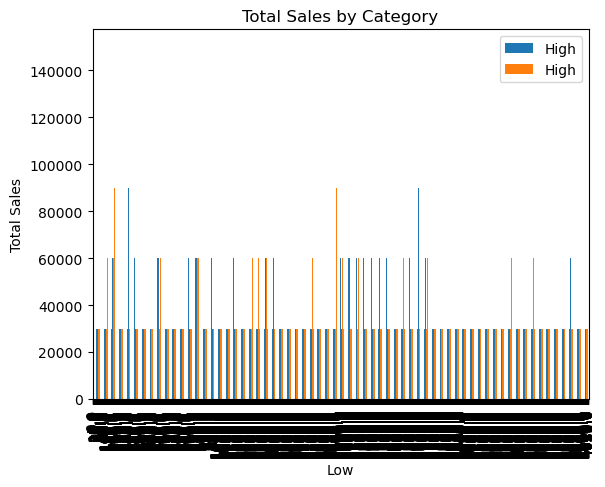

In [1471]:

df.groupby('Low')['High'].sum().plot(kind='bar', title='Total Sales by Category')
plt.ylabel('Total Sales')
plt.show()

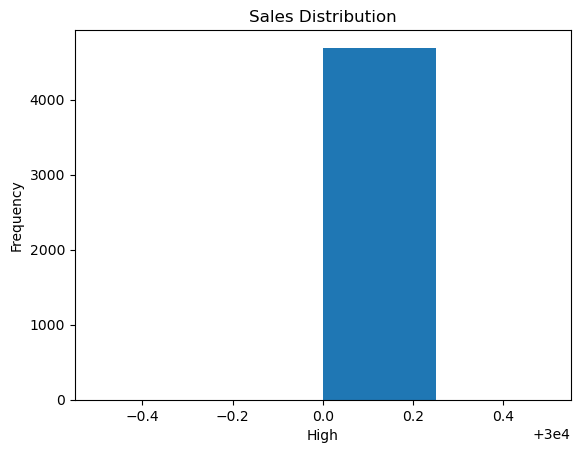

In [1485]:
# Drop the duplicated 'High' column
df = df.loc[:, ~df.columns.duplicated()]

# Plot the histogram
df['High'].plot(kind='hist', bins=4, title='Sales Distribution')
plt.xlabel('High')
plt.show()

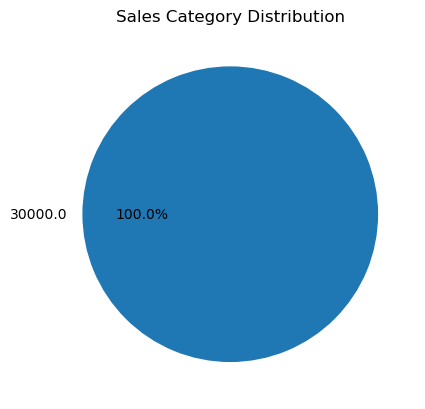

In [1492]:
df['High'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Sales Category Distribution')
plt.ylabel('')  # Remove the default y-label
plt.show()

<Axes: xlabel='High'>

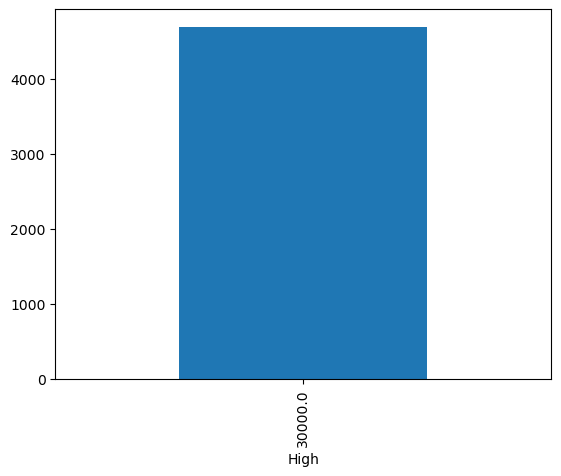

In [1500]:
df['High'].value_counts().plot(kind="bar")

<Axes: xlabel='High'>

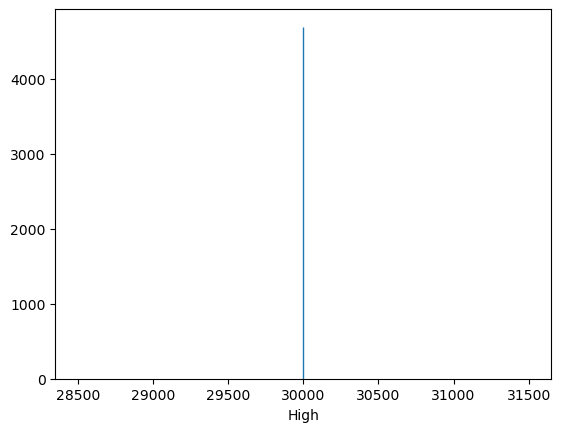

In [1499]:
df['High'].value_counts().plot(kind="area")

<Axes: ylabel='Frequency'>

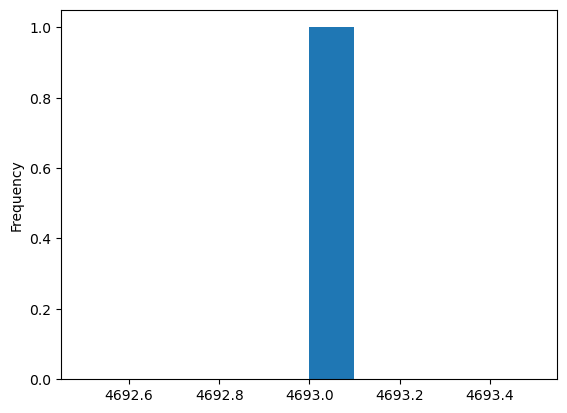

In [1498]:
df['High'].value_counts().plot(kind="hist")

<Axes: ylabel='Density'>

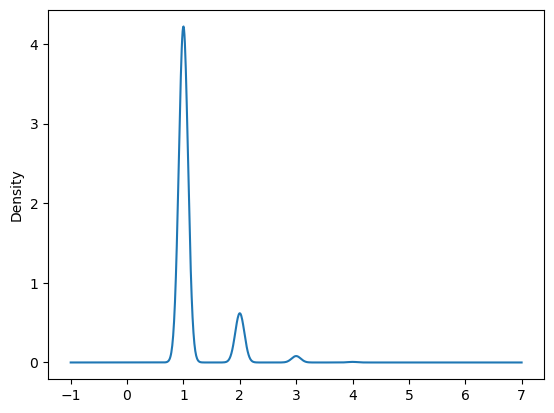

In [1502]:
df['Low'].value_counts().plot(kind="kde")

<Axes: xlabel='Low'>

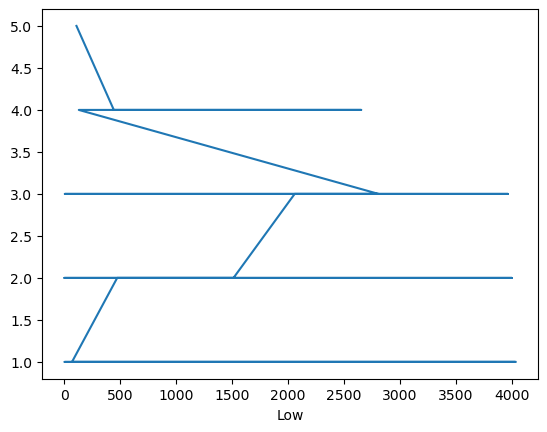

In [1515]:
df['Low'].value_counts().plot(kind="line")

<Axes: >

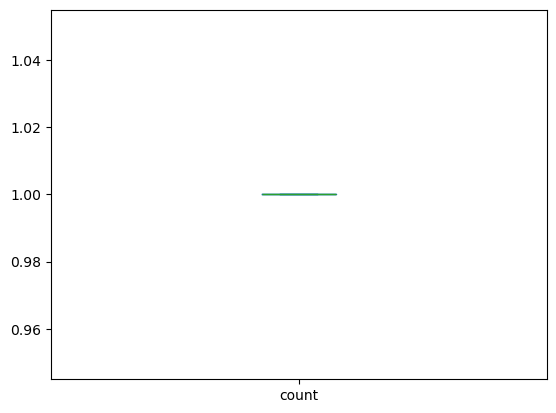

In [1516]:
df['Date'].value_counts().plot(kind="box")

<Axes: xlabel='Date'>

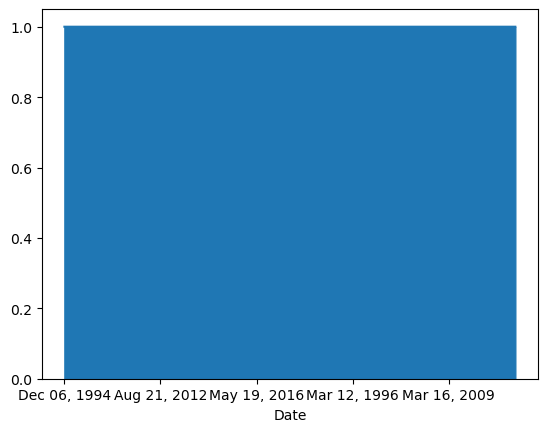

In [1521]:
df['Date'].value_counts().plot(kind="area")

## *saving data*

In [1531]:
df = pd.read_csv("Gold_data.csv")
df
df.to_excel('Gold_data.xlsx', index = False)